# define parameters

### Calculate the molecular length

In [4]:
from math import cos, radians

def average(num_1, num_2 = None):
    if type(num_1) is list:
        return sum(num_1) / len(num_1)
    else:
        if num_2 is not None:
            numbers = [num_1, num_2]
            average = sum(numbers) / len(numbers)
            return average
        else:
            return num_1

# chemical dimensions in Angstroms (as the averages from https://en.wikipedia.org/wiki/Bond_length) and degrees
chemical_dimensions = {
    'bond':{
        'c-c':average(1.2,1.54),
        'c-h':average(1.06,1.12),
        'c-n':average(1.47,2.1),
        'c-f':average(1.34),
        'n=n':average(1.23) # https://doi.org/10.1016/B978-0-08-101033-4.00003-6
    },
    'angle':{
        'sp3':109.5,
        'sp2':120
    }
}

# abbreviate dimensions
cc_bond = chemical_dimensions['bond']['c-c']
cn_bond = chemical_dimensions['bond']['c-n']
mostly_forward_sp2 = cos(radians(chemical_dimensions['angle']['sp2']-90))
less_forward_sp2 = cos(radians(180-chemical_dimensions['angle']['sp2']))

# calculate the total molecular length & width
center_porphyrin_length = (cc_bond*(3*mostly_forward_sp2 + less_forward_sp2))
sp2_extension = (cc_bond * (2 + less_forward_sp2) + cn_bond * (1 + less_forward_sp2))
total_length = sp2_extension + center_porphyrin_length
print(total_length, 'Angstroms')

10.346864409554044 Angstroms


In [5]:
from scipy.constants import micro

# define parameters
photosensitizer_molar = 10*micro
photosensitizer_characteristics = {
    'formula': {
        'value': 'C44_H38_N8_I4'   # mass with iodides included, sans iodides 678.84,
    },
    'dimensions':{
        'length (A)': total_length,
        'width (A)': total_length,
        'depth (A)': 1.5,
        'shape': 'disc',
    }
}
light_characteristics = {
    "visible_proportion": {
      "value": (700-390)/(700-380),
    }
}

# A biofilm system without absorbance data

,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.024620,0.936662,0.010826,1.198333
0.100418,0.048474,0.936645,0.021579,1.198222
0.150628,0.071593,0.936629,0.032262,1.198111
0.200837,0.094007,0.936613,0.042875,1.197999
0.251046,0.115743,0.936597,0.053422,1.197888
...,...,...,...,...
11.799163,0.989530,0.932874,1.980037,1.173110
11.849372,0.989717,0.932858,1.987882,1.173006
11.899582,0.989901,0.932842,1.995727,1.172901


hours to target: 4.117154811715481
hours to target: 4.117154811715481
The prediction of 4.117154811715481 is within the 4.5+/-2.2 tolerance of the actual value.
A -8.511111111111111%-error


,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.048636,0.936645,0.021653,1.198222
0.100418,0.094607,0.936613,0.043163,1.197999
0.150628,0.138089,0.936580,0.064538,1.197777
0.200837,0.179242,0.936548,0.085785,1.197555
0.251046,0.218211,0.936516,0.106910,1.197332
...,...,...,...,...
11.799163,0.999964,0.929099,4.446130,1.149345
11.849372,0.999966,0.929067,4.464695,1.149149
11.899582,0.999967,0.929035,4.483260,1.148953


hours to target: 5.623430962343096
hours to target: 5.623430962343096
The prediction of 5.623430962343096 is within the 4.5+/-2.2 tolerance of the actual value.
A 24.88888888888889%-error


,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.094910,0.936613,0.043308,1.197999
0.100418,0.180297,0.936548,0.086343,1.197555
0.150628,0.257208,0.936483,0.129133,1.197110
0.200837,0.326559,0.936418,0.171700,1.196667
0.251046,0.389153,0.936353,0.214067,1.196223
...,...,...,...,...
11.799163,1.000000,0.921637,9.239402,1.105887
11.849372,1.000000,0.921574,9.273665,1.105538
11.899582,1.000000,0.921511,9.310432,1.105189


hours to target: 4.2677824267782425
hours to target: 4.2677824267782425
The prediction of 4.2677824267782425 is within the 4.5+/-2.2 tolerance of the actual value.
A -5.155555555555556%-error


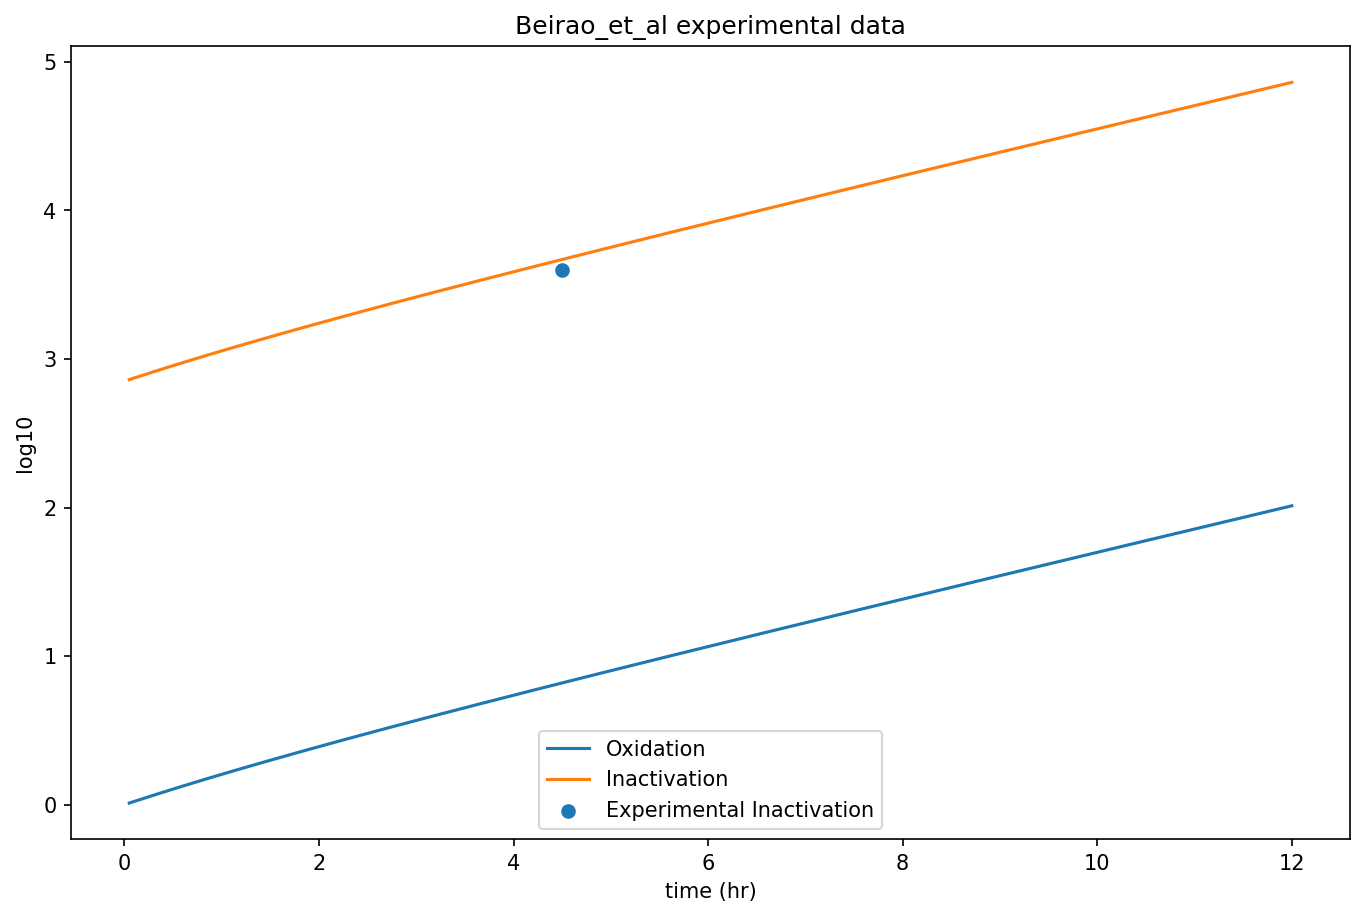

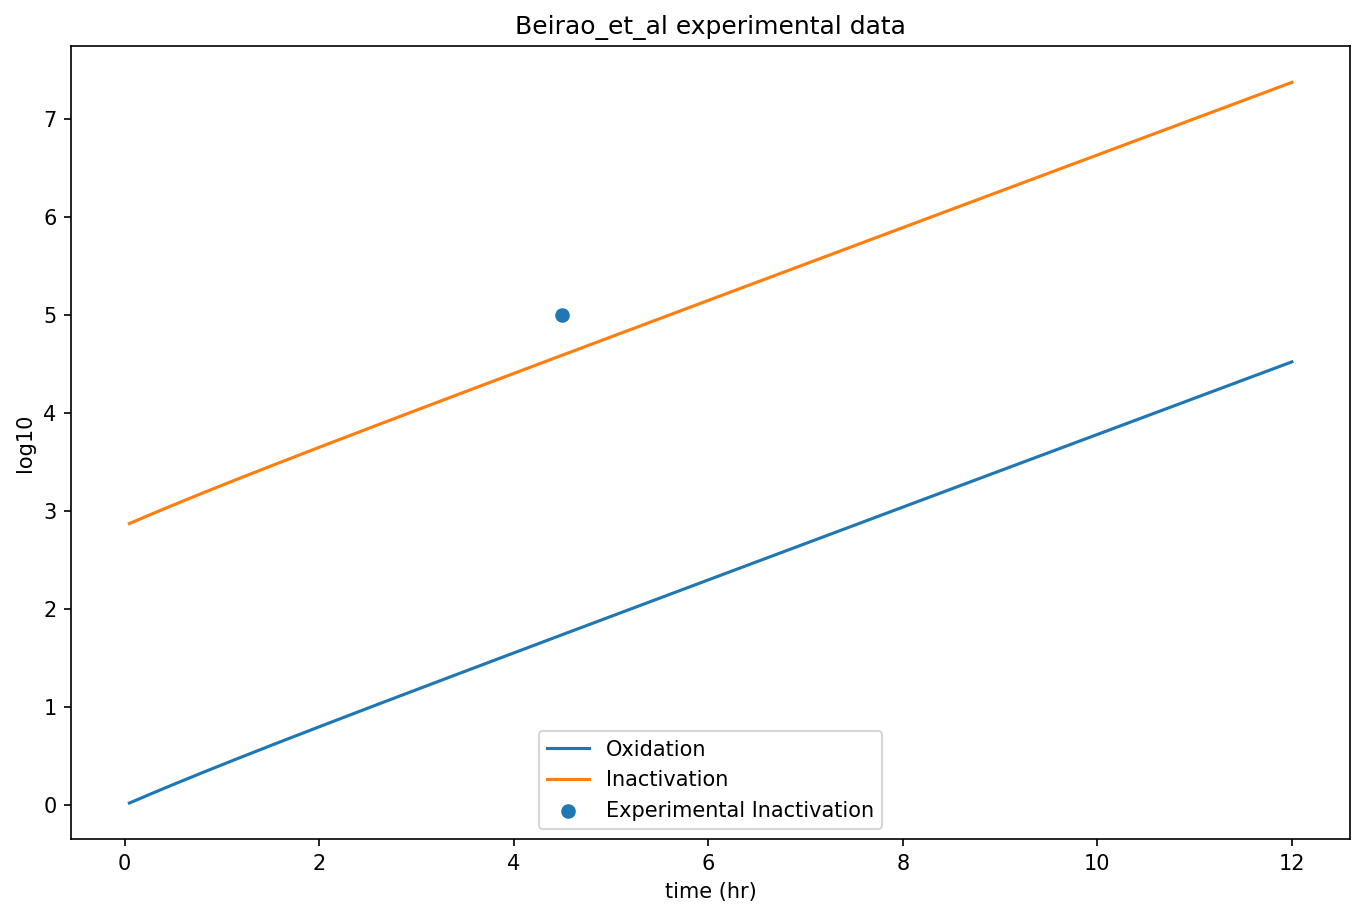

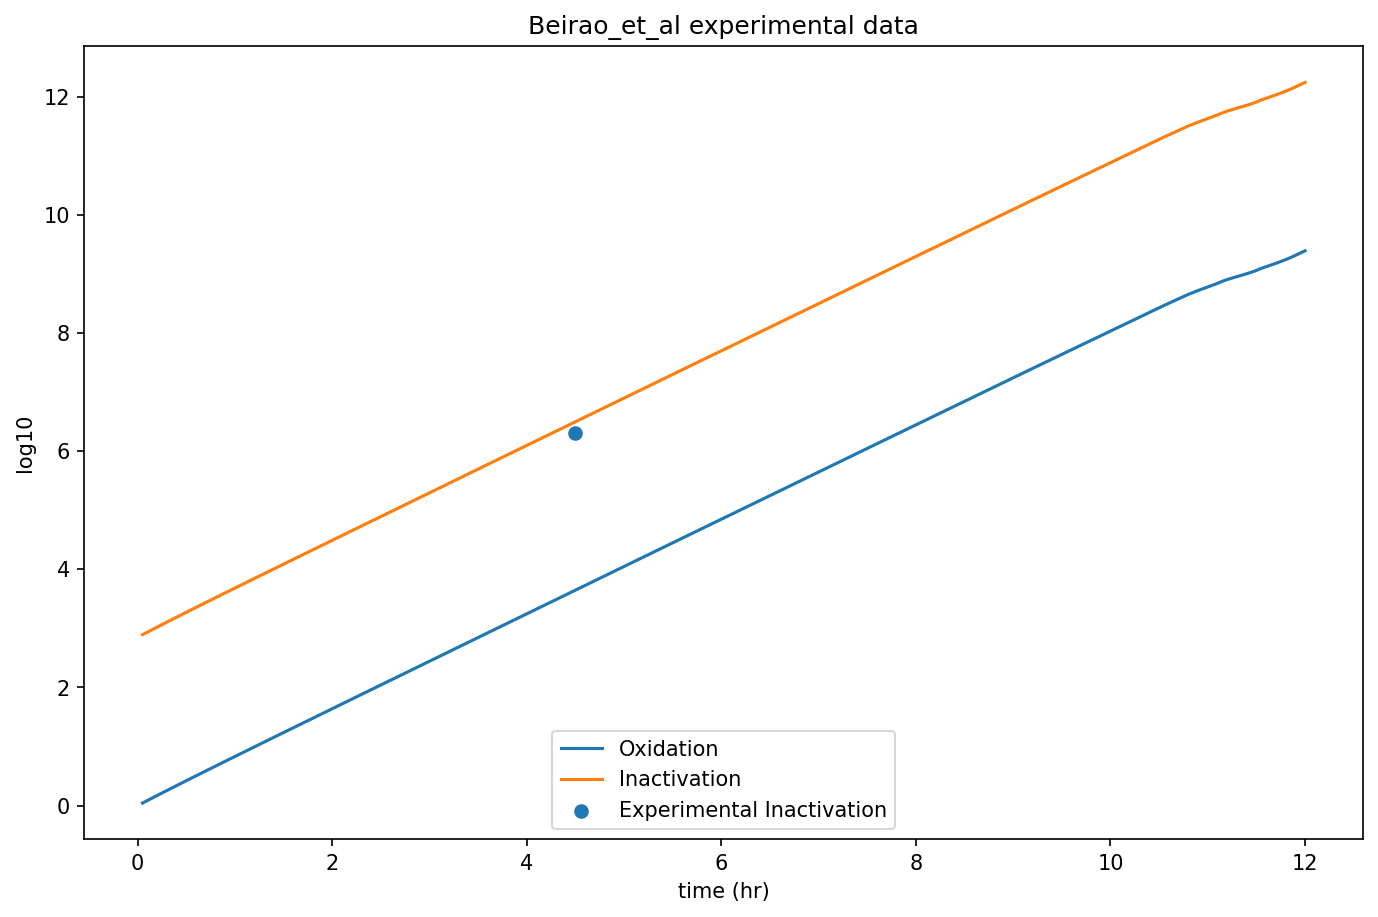

In [8]:
from uncertainties import ufloat
from math import isclose

# execute the simulation
%run ../../../../pdipy/pdi.py
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:
    # determine the experimental result
    actual_time = 4.5
    if photosensitizer_molar == 20*micro:
        actual_reduction = 6.3
    elif photosensitizer_molar == 5*micro:
        actual_reduction = 3.6
    elif photosensitizer_molar == 10*micro:
        actual_reduction = 5
        
    # execute the simulation
    pdi = PDI(verbose = False, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        biofilm = True,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = photosensitizer_characteristics,
        photosensitizer_molar = photosensitizer_molar,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = light_characteristics, 
        measurement = {'irradiance': 4}
    )
    pdi.simulate(
        export_name = 'sans Absorption data',
        figure_title = 'Beirao_et_al experimental data',
        display_fa_oxidation = True,
        experimental_data = {
            'x': [actual_time],
            'y': [actual_reduction]
        },
        export_contents = False
    )
    
    value, unit = pdi.parse_data(
        log_reduction = actual_reduction
    )            
    # calculate the %-error
    tolerance = actual_time/2
    acceptable_range_float = ufloat(actual_time, tolerance)
    if isclose(value, actual_time, abs_tol=tolerance):
        print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_time, 3)/actual_time*100}%-error')
    else:
        print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_time, 3)/actual_time*100}%-error')

# A biofilm system with absorbance data

,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.026262,0.999944,0.011558,4.255168
0.100418,0.051664,0.999944,0.023038,4.255041
0.150628,0.076243,0.999944,0.034442,4.254914
0.200837,0.100034,0.999944,0.045774,4.254788
0.251046,0.123070,0.999944,0.057035,4.254661
...,...,...,...,...
11.799163,0.992887,0.999941,2.147942,4.226423
11.849372,0.993027,0.999941,2.156556,4.226304
11.899582,0.993164,0.999941,2.165171,4.226185


hours to target: 3.8158995815899583
hours to target: 3.8158995815899583
The prediction of 3.8158995815899583 is within the 4.5+/-2.2 tolerance of the actual value.
A -15.200000000000003%-error


,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.051835,0.999944,0.023116,4.255041
0.100418,0.100670,0.999944,0.046081,4.254788
0.150628,0.146710,0.999944,0.068903,4.254534
0.200837,0.190141,0.999944,0.091591,4.254281
0.251046,0.231138,0.999944,0.114151,4.254027
...,...,...,...,...
11.799163,0.999984,0.999937,4.807778,4.199334
11.849372,0.999985,0.999937,4.827990,4.199110
11.899582,0.999986,0.999937,4.848202,4.198887


hours to target: 5.2217573221757325
hours to target: 5.2217573221757325
The prediction of 5.2217573221757325 is within the 4.5+/-2.2 tolerance of the actual value.
A 16.044444444444444%-error


,oxidation,excitation,log10-oxidation,log10-excitation
time (hr),,,,
0.050209,0.100990,0.999944,0.046235,4.254788
0.100418,0.191248,0.999944,0.092185,4.254281
0.150628,0.272016,0.999944,0.137878,4.253774
0.200837,0.344373,0.999944,0.183343,4.253269
0.251046,0.409259,0.999944,0.228603,4.252763
...,...,...,...,...
11.799163,1.000000,0.999929,10.040342,4.149741
11.849372,1.000000,0.999929,10.087280,4.149343
11.899582,1.000000,0.999929,10.131650,4.148944


hours to target: 3.96652719665272
hours to target: 3.96652719665272
The prediction of 3.96652719665272 is within the 4.5+/-2.2 tolerance of the actual value.
A -11.844444444444445%-error


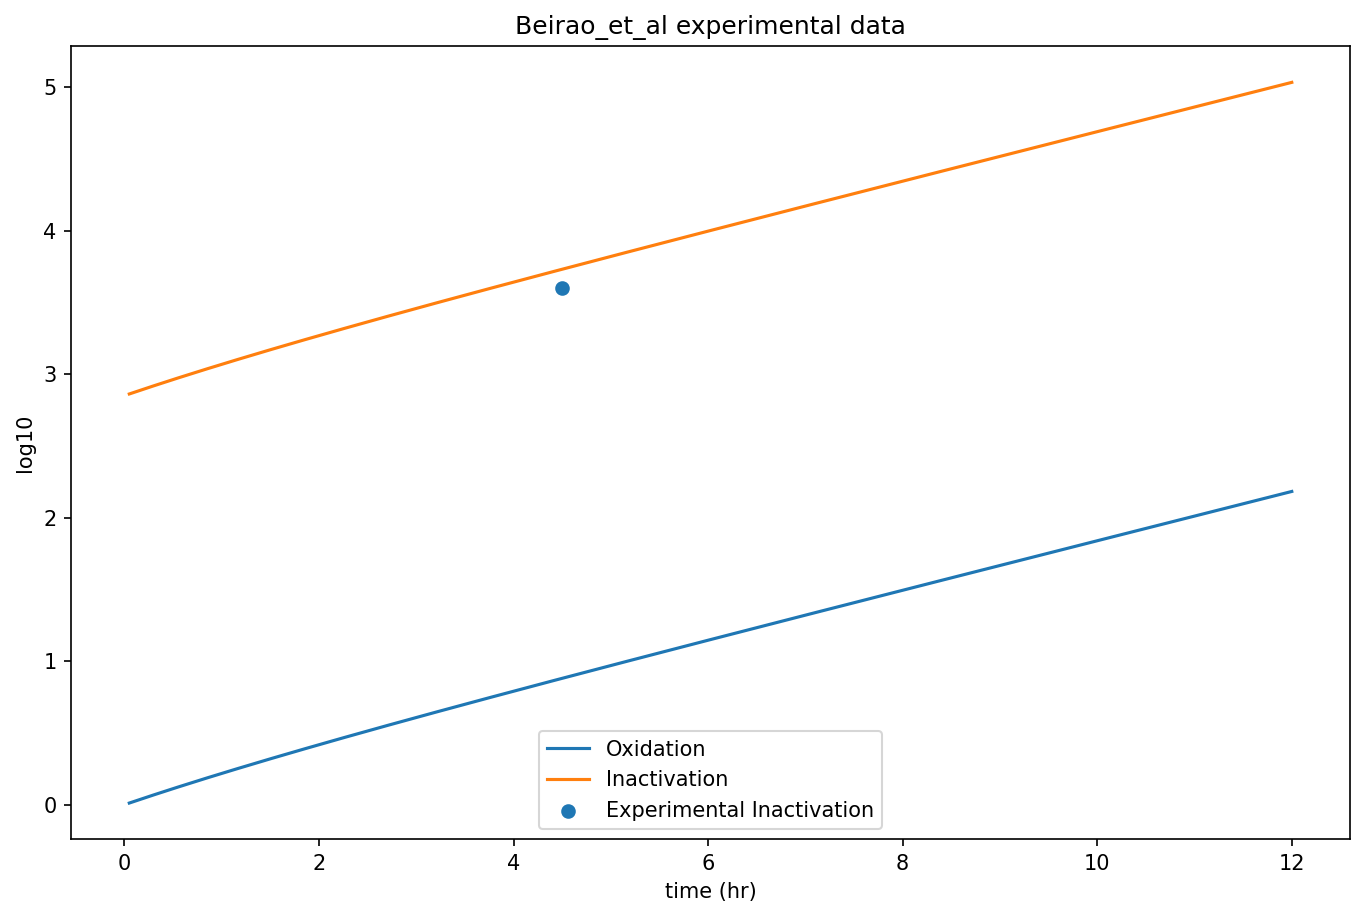

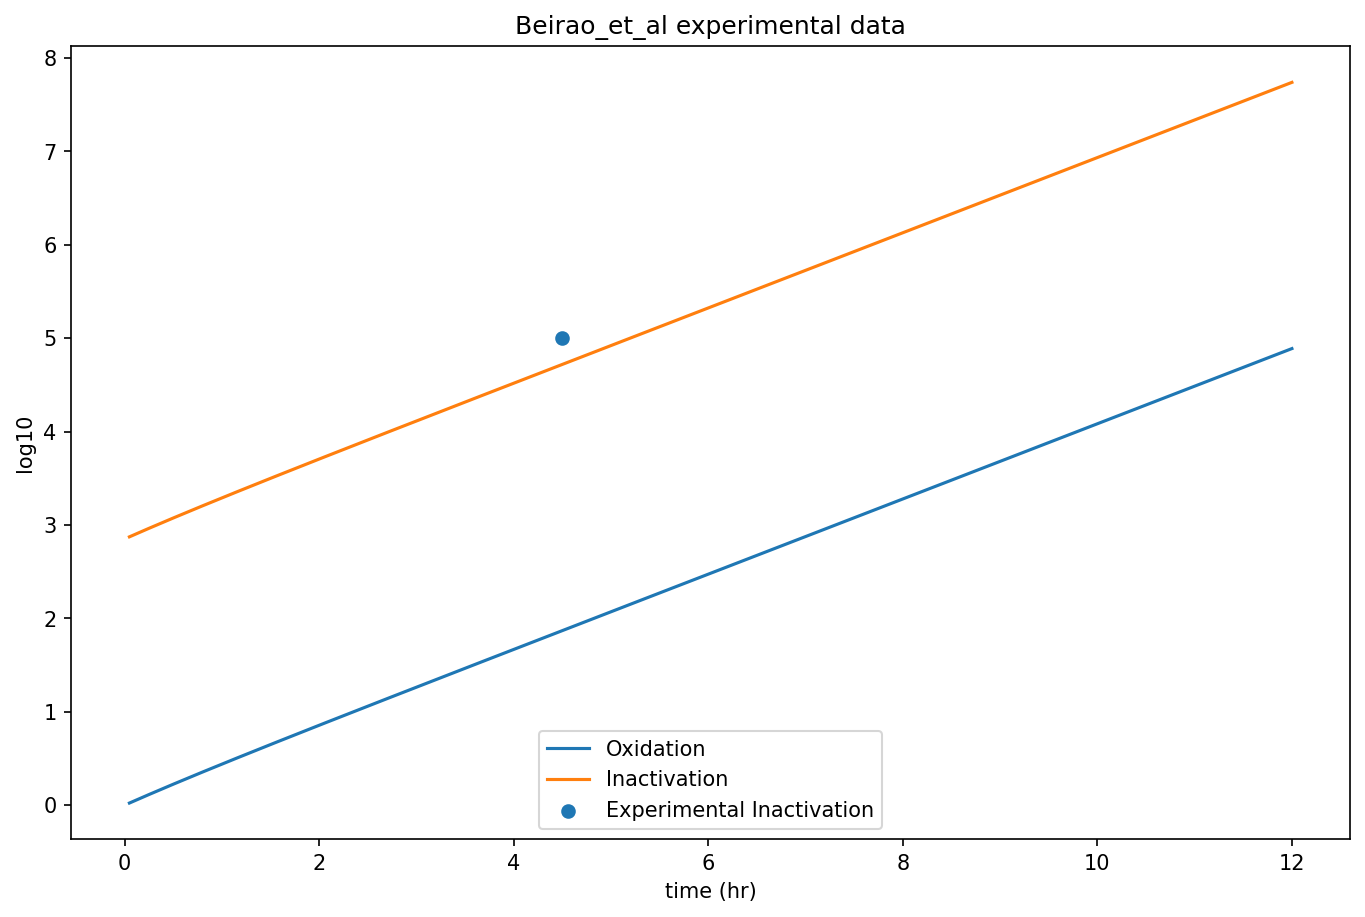

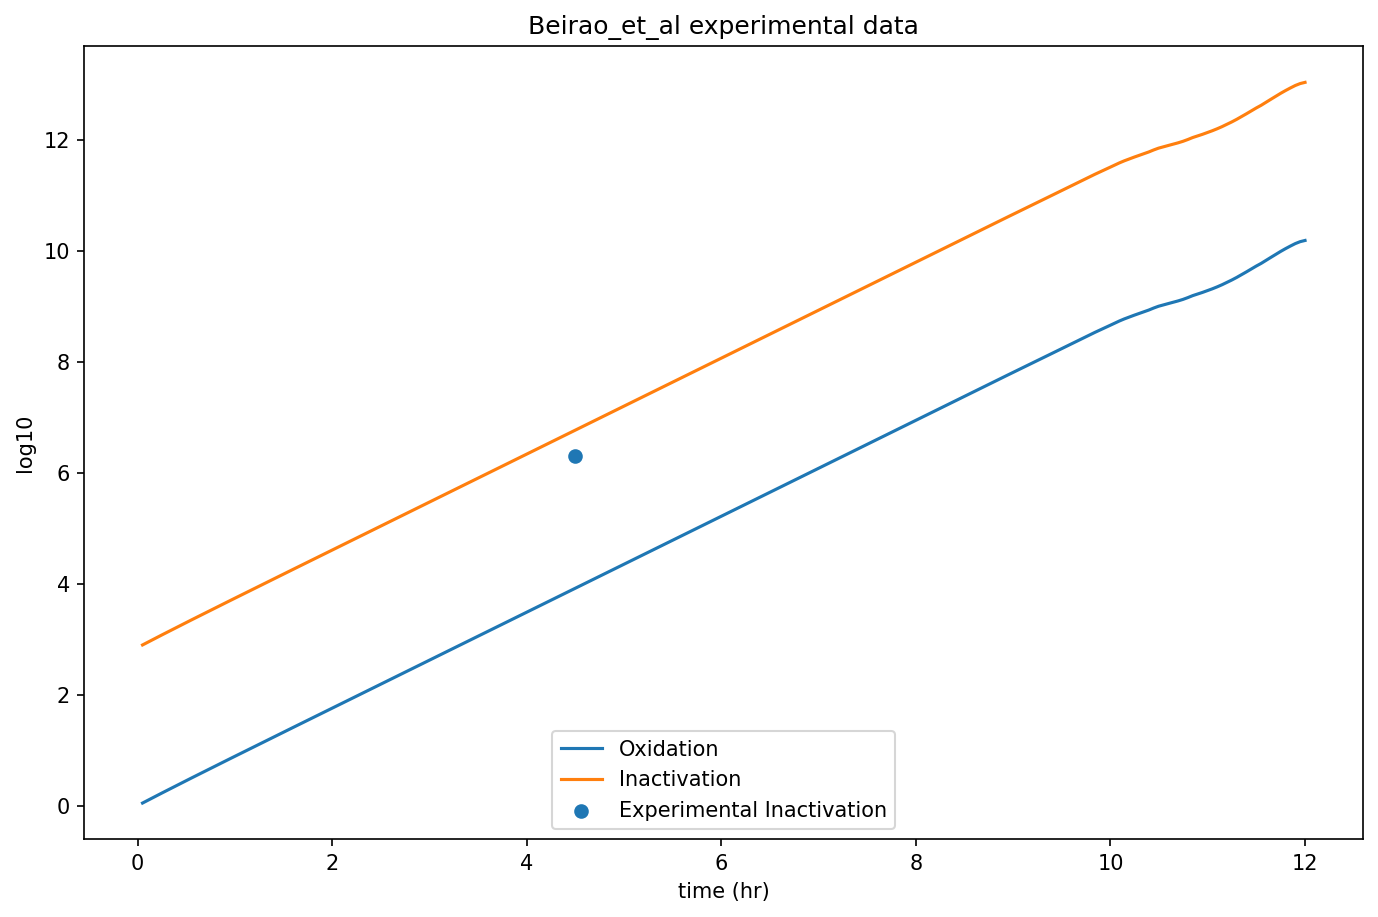

In [9]:
from uncertainties import ufloat
from math import isclose

# execute the simulation
%run ../../../../pdipy/pdi.py
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:
    # determine the experimental result
    actual_time = 4.5
    if photosensitizer_molar == 20*micro:
        actual_reduction = 6.3            
        absorbance_nm = {
            '400-430':2,
            '550-650':1
        }      
    elif photosensitizer_molar == 5*micro:
        actual_reduction = 3.6
        absorbance_nm = {
            '400-430':0.5,
            '550-650':0.25
        }
    elif photosensitizer_molar == 10*micro:
        actual_reduction = 5
        absorbance_nm = {
            '400-430':1,
            '550-650':0.5
        }
        
    # execute the simulation
    pdi = PDI(verbose = False, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        biofilm = True,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = photosensitizer_characteristics,
        photosensitizer_molar = photosensitizer_molar,
        absorbance_nm = absorbance_nm,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = light_characteristics, 
        measurement = {'irradiance': 4}
    )
    pdi.simulate(
        export_name = 'Absorption data',
        figure_title = 'Beirao_et_al experimental data',
        display_fa_oxidation = True,
        experimental_data = {
            'x': [actual_time],
            'y': [actual_reduction]
        },
        export_contents = False
    )
    
    value, unit = pdi.parse_data(
        log_reduction = actual_reduction
    )            
    # calculate the %-error
    tolerance = actual_time/2
    acceptable_range_float = ufloat(actual_time, tolerance)
    if isclose(value, actual_time, abs_tol=tolerance):
        print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_time, 3)/actual_time*100}%-error')
    else:
        print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_time, 3)/actual_time*100}%-error')